In [14]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import *
np.set_printoptions(threshold=np.inf)

In [15]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

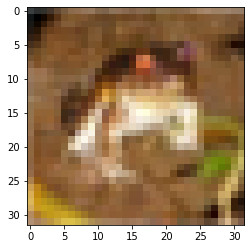

In [16]:
  plt.imshow(x_train[0])

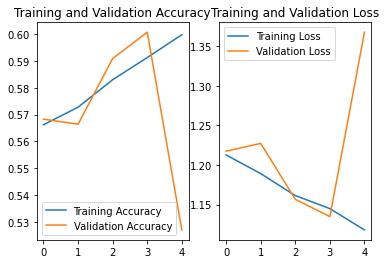

In [28]:
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5,5), padding='same')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d1 = Dropout(0.2)
        
        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y
    
model = Baseline()
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = './checkpoint/BaseLine.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print("-----load model-----")
    model.load_weights(checkpoint_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()
file = open('./baseline_weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', padding='valid')
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.c2 = Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid', padding='valid')
        self.p2 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f2 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

In [29]:
class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3,3), padding='valid')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.c2 = Conv2D(filters=256, kernel_size=(3,3), padding='valid')
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.c3 = Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')
        
        self.c4 = Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')
        
        self.c5 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')
        self.p3 = MaxPool2D(pool_size=(3,3), strides=2, padding='valid')
        
        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        
        x = self.c2(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p2(x)
        
        x = self.c3(x)
        
        x = self.c4(x)
        
        x = self.c5(x)
        x = self.p3(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y

In [ ]:
class VGG16(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3,3), padding='valid')
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.c2 = Conv2D(filters=256, kernel_size=(3,3), padding='valid')
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')
        
        self.c3 = Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')
        
        self.c4 = Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu')
        
        self.c5 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')
        self.p3 = MaxPool2D(pool_size=(3,3), strides=2, padding='valid')
        
        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        
        x = self.c2(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p2(x)
        
        x = self.c3(x)
        
        x = self.c4(x)
        
        x = self.c5(x)
        x = self.p3(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y